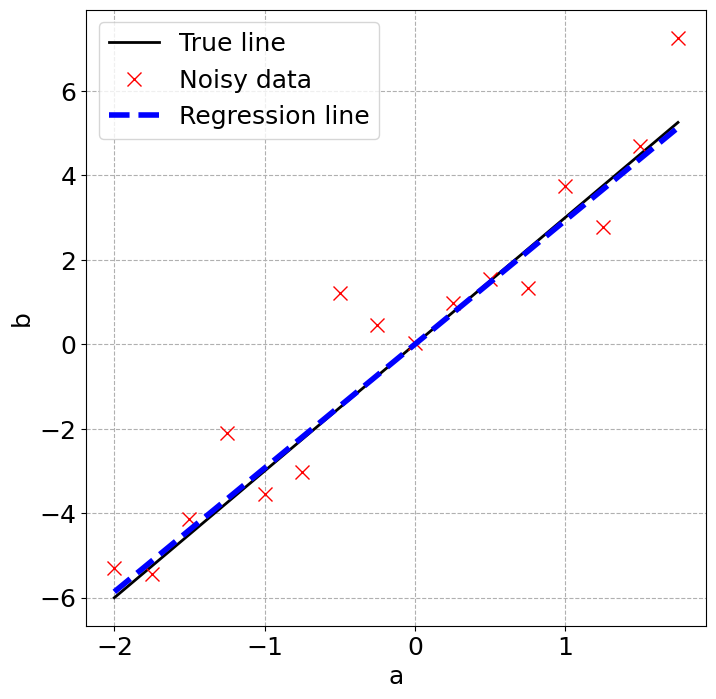

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

x = 3 # True slope
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn(*a.shape) # Add noise

plt.plot(a, x*a, color='k', linewidth=2, label='True line') # True relationship
plt.plot(a, b, 'x', color='r', ms=10, label='Noisy data') # Noisy measurements

U, S, VT = np.linalg.svd(a,full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit

plt.plot(a,xtilde * a,'--',color='b',linewidth=4, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()


In [4]:
# Three methods of computing regression

xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) @ b

assert np.allclose(xtilde1, xtilde2)  # check that the two methods yield the same result

# The third method is specific to Matlab:
# xtilde3 = regress(b,a)